In [4]:
from tensorflow.keras.datasets import cifar10

(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# 타겟 데이터의 dimension은 1로 맞춰준다.
# one-hot encoding의 적용 여부를 판단하기 편하다.
print(train_images.shape, train_targets.squeeze().shape)
print(test_images.shape, test_targets.squeeze().shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [ ]:
# (50000, 1) : 2차원, squeeze() 를 사용해서 차원을 감소시켜준다.

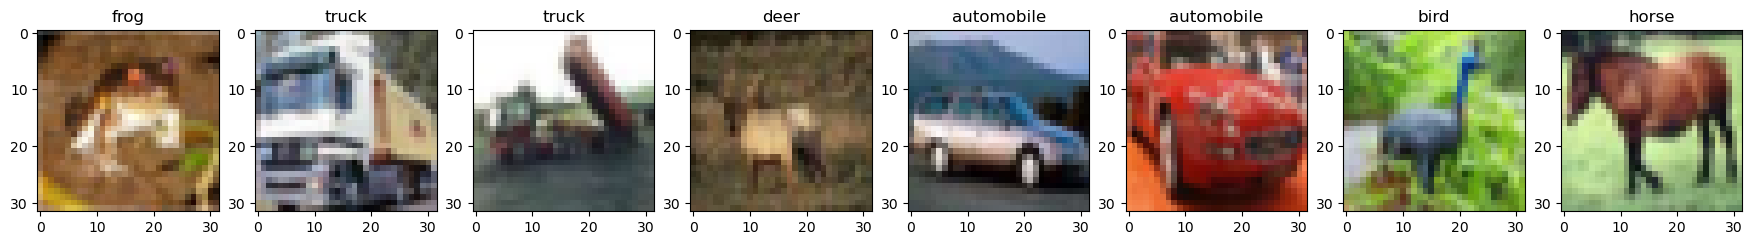

In [9]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def show_images(images, targets, ncols=8):
    fig, axes = plt.subplots(figsize=(22,6), nrows=1, ncols= ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(class_names[int(target)])

show_images(train_images[:8], train_targets[:8])
# show_images(train_images[8:16], train_targets[8:16])

In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [ ]:
train_images[0]

In [ ]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# padding의 default는 valid이다.
x = Conv2D(filters=32, kernel_size=5, padding='valid', activation='relu')(input_tensor)
# 보통 사이즈는 32, 16 유지. 성능이 떨어지기 떄문에 너무 작아지지 않게 조절해야한다.
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)


x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

                 
x = Conv2D(filters=128, kernel_size=5, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
# 개수가 늘어나는게 노말한 방식

# name이라는 속성을 줄 수 있는데 썸머리에 나오는 이름이 변경됨
x = Flatten(name='classifierA00')(x)
x = Dropout(name='classifierA_DroupOut01', rate=0.5)(x)
x = Dense(300, activation='relu', name='classifierAD01')(x)
x = Dropout(name='classifierA_DroupOut02', rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-DropOut01 (Dropout)      │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 300)                 │         345,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA-DropOut02 (Dropout)      │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801,294 (3.06 MB)

 Trainable params: 801,294 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 원핫인코딩을 직접 하고싶지 않을때에는 SparseCategoricalCrossentropy 를 사용한다.
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [13]:
# validation_split=0.2 를 주면 따로 벨리데이션을 나누지 않아도 알아서 나눠진다.
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - acc: 0.2230 - loss: 2.0240 - val_acc: 0.4587 - val_loss: 1.4779
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - acc: 0.4711 - loss: 1.4288 - val_acc: 0.5437 - val_loss: 1.2555
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - acc: 0.5653 - loss: 1.2142 - val_acc: 0.6317 - val_loss: 1.0378
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - acc: 0.6316 - loss: 1.0288 - val_acc: 0.6522 - val_loss: 0.9789
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - acc: 0.6752 - loss: 0.9139 - val_acc: 0.6767 - val_loss: 0.9240
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - acc: 0.7178 - loss: 0.8034 - val_acc: 0.7215 - val_loss: 0.8082
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - acc: 0.7553 - loss: 0.7009 - val_acc: 0.7221 - val_loss: 0.8235
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - acc: 0.7746 - loss: 0.6417 - val_acc: 0.7320 - val_loss: 0.7938
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# 너무 일반화가 되서 과적합이 떴다.

In [15]:
# 테스트 데이터 세트로 모델 성능 검증하기
model.evaluate(test_images, test_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.7654 - loss: 1.0548


[1.0504194498062134, 0.7634999752044678]

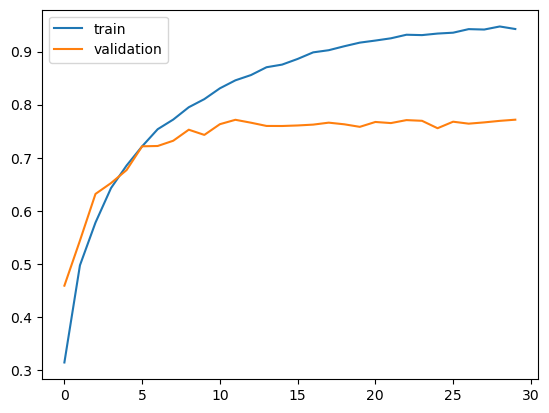

In [16]:
import matplotlib.pyplot as plt
# 그래프 확인하기
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [17]:
pred_probas = model.predict(test_images[8:16], batch_size=128)
# 8장을 넣었을때 그에 해당하는 max값. class_name의 인덱스 번호로 사용하면 된다.
pred_classes = np.argmax(pred_probas.squeeze(), axis=1)
print(pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[3 9 4 9 5 7 9 8]


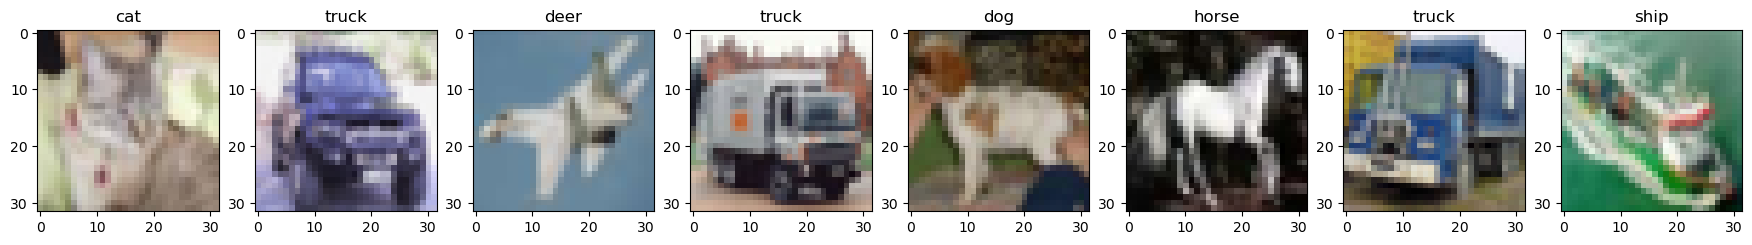

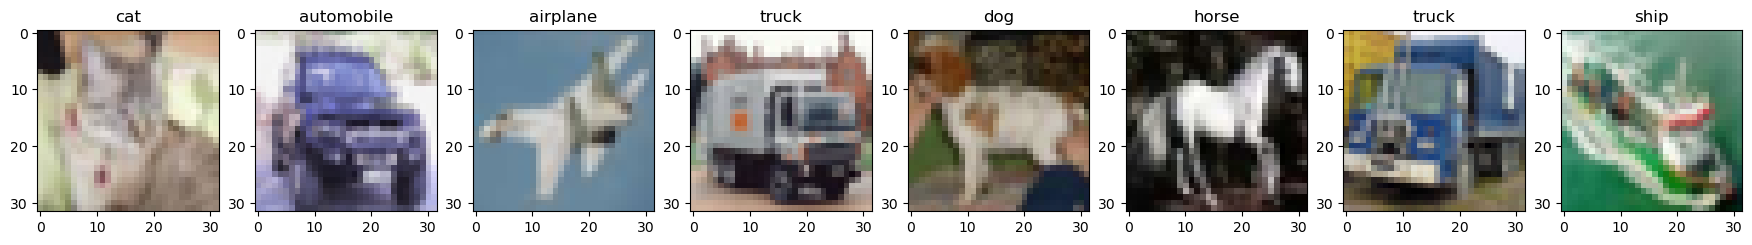

In [18]:
# 내가 예측한 것들 출력하기
show_images(test_images[8:16], pred_classes)
# 실제 정답 출력하기
show_images(test_images[8:16], test_targets[8:16])